## Predicting heart disease using Machine Learning


Our dataset is a binary classification which indicates info about some patients and label them to 0 or 1. 

### Problem definition 

Given clinical parameters about a patient, can we predict whether or not they have heart diseases.

### Data
the original data came from the Cleavland data from the USI Machine Learning repo.

Our goal is to reach 95% accuracy in our model.

## Preparing the tools 
We're going to use pandas, Matplotlib and NumPy for data analysis and manipulation

In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Classifiers from SkLearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Model evaluation 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
# from sklearn.metrics import plot_roc_curve




# plot_roc_curve has been removed in version 1.2. From 1.2, use RocCurveDisplay instead:

# Before sklearn 1.2:

# from sklearn.metrics import plot_roc_curve
# svc_disp = plot_roc_curve(svc, X_test, y_test)
# rfc_disp = plot_roc_curve(rfc, X_test, y_test, ax=svc_disp.ax_)

# From sklearn 1.2:

from sklearn.metrics import RocCurveDisplay
# svc_disp = RocCurveDisplay.from_estimator(svc, X_test, y_test)
# rfc_disp = RocCurveDisplay.from_estimator(rfc, X_test, y_test, ax=svc_disp.ax_)



## Load Data

In [46]:
df = pd.read_csv('./6.1 heart-disease.csv')
df.shape

(303, 14)

# Data exploration

In [47]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [48]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [49]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

<Axes: >

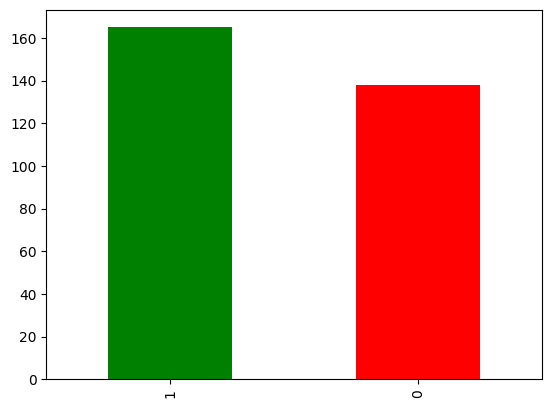

In [50]:
df['target'].value_counts().plot(kind='bar', color=['green', 'red'])

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [52]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [53]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [54]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart disease Frequency according to Sex

In [55]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [56]:
# Compare target column with sex column
pd.crosstab(df['target'], df['sex'])

sex,0,1
target,,
0,24,114
1,72,93


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

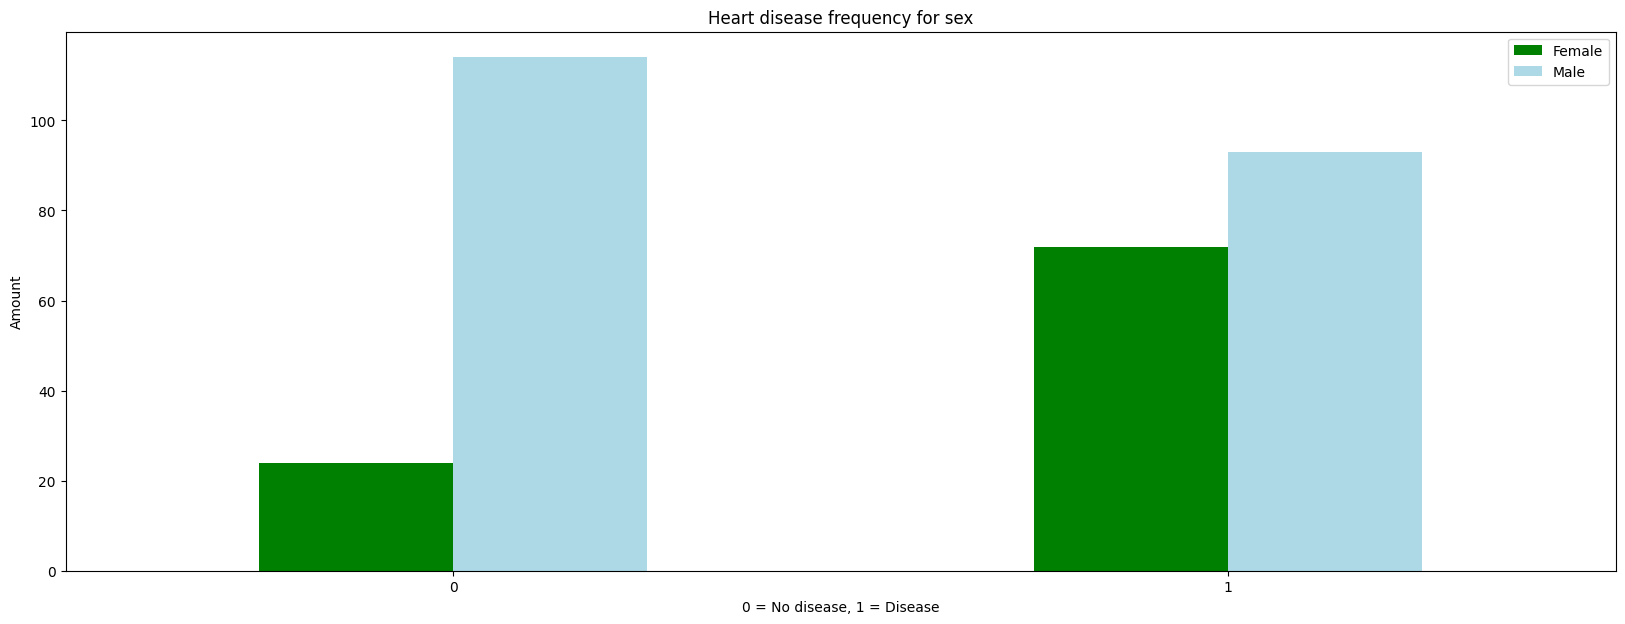

In [57]:
# Create a plot of crosstab
pd.crosstab(df.target, df.sex).plot(kind='bar',
                                    figsize=(20,7),
                                    color=['green','lightblue'])
plt.title("Heart disease frequency for sex")
plt.xlabel("0 = No disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation = 0)

<Axes: xlabel='target'>

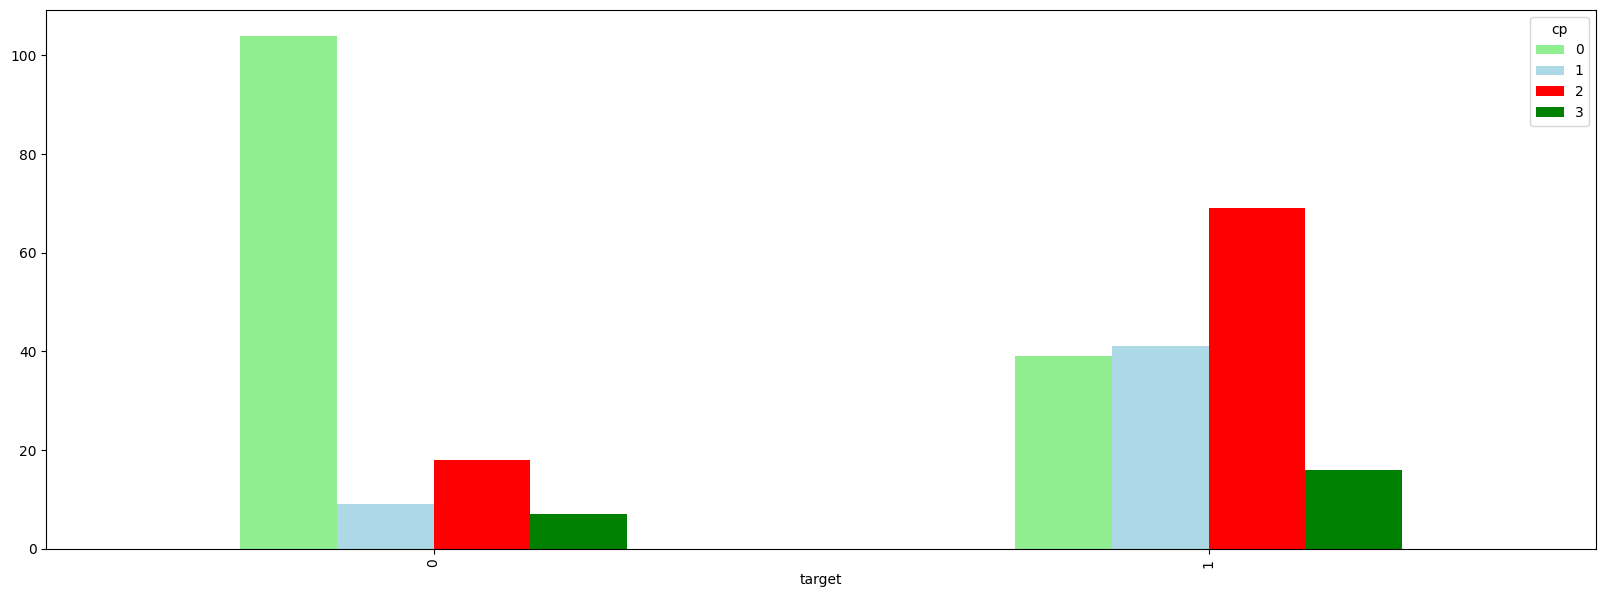

In [58]:
# Compare target column with CP coloumn
pd.crosstab(df['target'], df.cp).plot(kind='bar',
                                      figsize=(20,7),
                                      color = ['lightgreen', 'lightblue', 'red', 'green'])

### Age and Max Heart Rate for Heart Disease

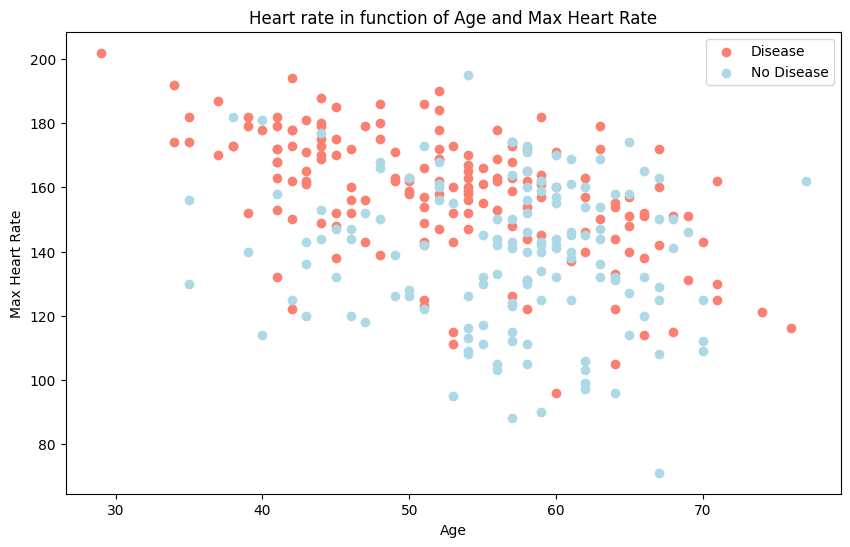

In [59]:
# Creating a figure
plt.figure(figsize=(10,6))

#Scatter with positive examples
plt.scatter(df.age[df['target'] ==1], df[df.target == 1]['thalach'], color='salmon')

#Scatter with negative example
plt.scatter(df.age[df.target == 0], df.thalach[df.target == 0], color='lightblue')

plt.title("Heart rate in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"])

Text(0.5, 0, 'Age')

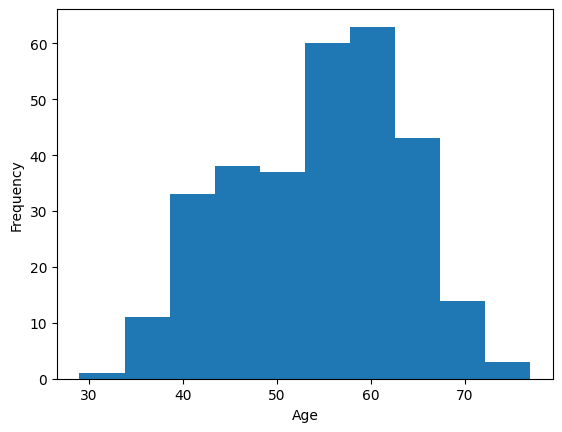

In [60]:
df.age.plot.hist();
plt.xlabel("Age")

## Heart Disease Frequency per Chest Pain Type

### cp - chest pain type

    . 0: Typical angina: chest pain related decrease blood supply to the heart

    . 1: Atypical angina: chest pain not related to heart

    . 2: Non-anginal pain: typically esophageal spasms (non heart related)

    . 3: Asymptomatic: chest pain not showing signs of disease 

In [61]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

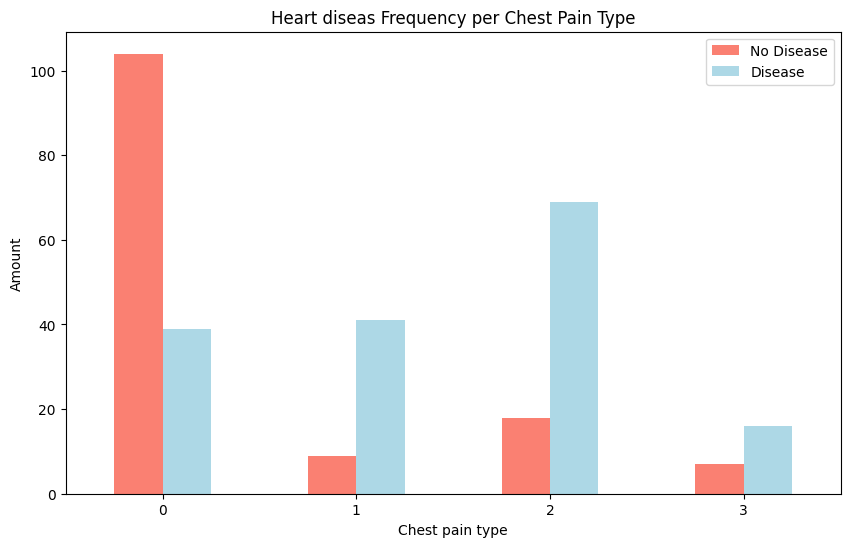

In [62]:
# Make the cross tab more visual

pd.crosstab(df.cp, df.target).plot(kind = 'bar',
                                   figsize=(10,6),
                                   color=['salmon', 'lightblue'])

plt.title("Heart diseas Frequency per Chest Pain Type")
plt.xlabel("Chest pain type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation = False)

In [63]:
dfcorr = df.corr()
dfcorr

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


<Axes: >

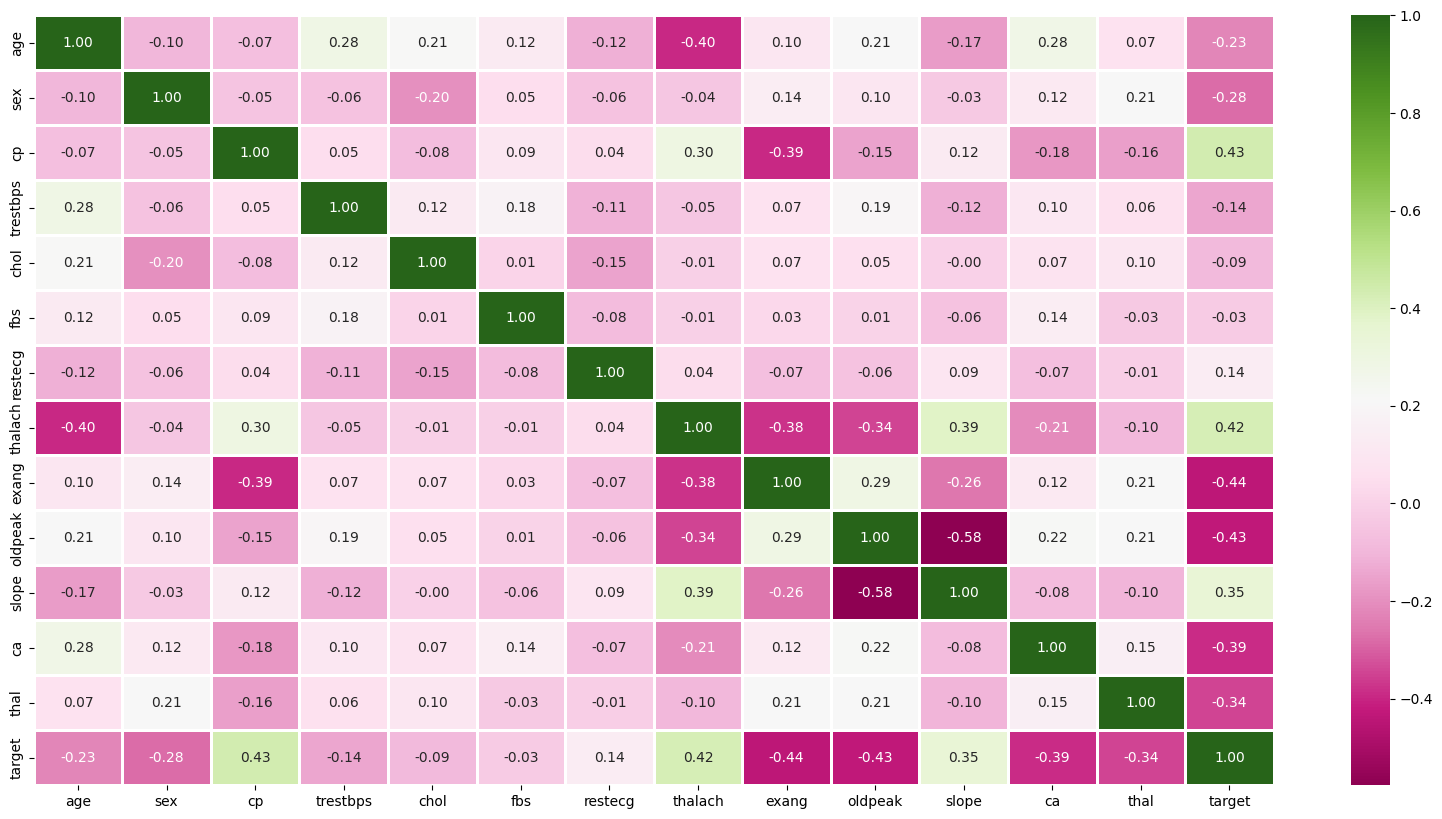

In [64]:
plt.figure(figsize=(20,10))
sns.heatmap(dfcorr, annot=True, cmap='PiYG', fmt='.2f', linewidths=2)

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

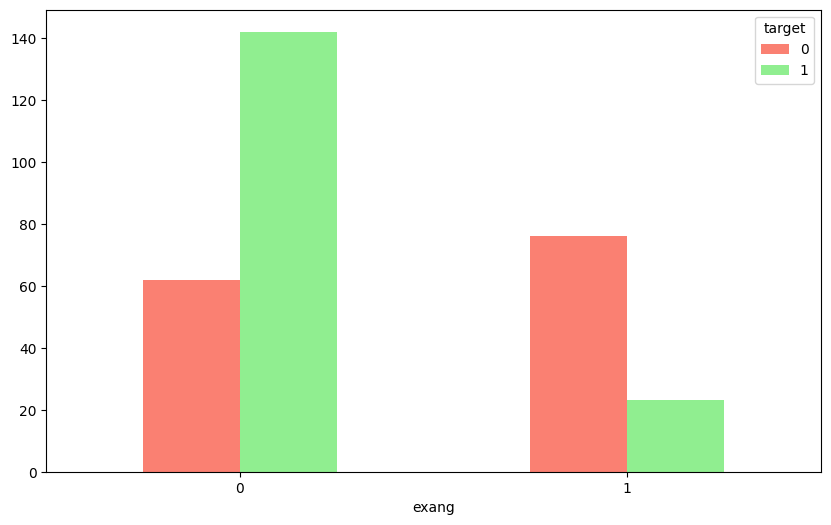

In [65]:
pd.crosstab(df.exang, df.target).plot(kind='bar', figsize=(10,6), color=['salmon', 'lightgreen'])
plt.xticks(rotation=False)
# plt.legend(['No Disease', 'Disease'])

## Modelling

In [66]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [67]:
#  Split data into X and y
X = df.drop('target', axis=1)
y = df['target']

In [68]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [69]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [70]:
# Split data into train and test set
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

In [71]:
X_train.shape

(242, 13)

In [72]:
X_test.shape

(61, 13)

## Build ML model

Time to build the machine learning model:

we'll train our data with train set.

and we'll test the data using test set.

1. Logistic Regression
2. K-Nearest Neighbors
3. Random Forest Classifier

In [73]:
# Put models in a dictionary
models = {"LogisticRegression": LogisticRegression(max_iter=1000),
          "KNN": KNeighborsClassifier(n_neighbors=1),
          "Random Forest": RandomForestClassifier()}

def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates our model given Machine Learning models.
    Models : a dict of different Scikit-Learn Machine Learnig models
    X_test : testing data (no labels)
    X_train : training data (no labels)
    y_test : test labels
    y_train : train labels
    """

    #set random seeds
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    #loop through models
    for name, model in models.items():
        #Fit the model to the data
        model.fit(X_train, y_train)
        #Evaluate the model and caculate the score of our model
        model_scores[name] = round(model.score(X_test,y_test), 4)*100
    return model_scores


In [74]:
models = {"LogisticRegression": LogisticRegression(max_iter=1000),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

print(models.items())

dict_items([('LogisticRegression', LogisticRegression(max_iter=1000)), ('KNN', KNeighborsClassifier()), ('Random Forest', RandomForestClassifier())])


In [75]:
model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)

In [76]:
model_scores

{'LogisticRegression': 88.52, 'KNN': 68.85, 'Random Forest': 83.61}

In [77]:
model_compare = pd.DataFrame(model_scores, index=["Accuracy"])

(array([0, 1, 2]),
 [Text(0, 0, 'LogisticRegression'),
  Text(1, 0, 'KNN'),
  Text(2, 0, 'Random Forest')])

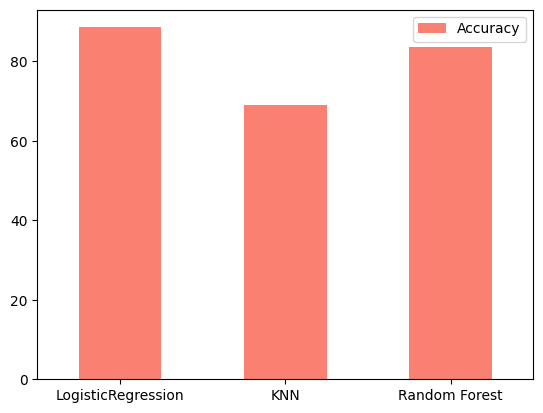

In [78]:
model_compare.T.plot(kind='bar', color = 'salmon')
plt.xticks(rotation = False)


Now we've got baseline model... and we know a model's first prediction aren't always what we should based our next steps off. So, what should we do ?!

Let's look at the following:
* Hyperparameter tuning
* Feature importance
* confusion matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area under the curve (AUC)

### Hyperparameter tuning



In [79]:
# KNN tuning
train_scores = []
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1,100)

#Setup KNN instance
knn_classifier = KNeighborsClassifier()

#Loop through different n_neighbors:
for i in neighbors:
    knn_classifier.set_params(n_neighbors = i)
    knn_classifier.fit(X_train, y_train)
    train_scores.append(knn_classifier.score(X_train, y_train))
    test_scores.append(knn_classifier.score(X_test, y_test))


In [80]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058,
 0.6859504132231405,
 0.6694214876033058,
 0.7024793388429752,
 0.6735537190082644,
 0.6983471074380165,
 0.6942148760330579,
 0.6983471074380165,
 0.6859504132231405,
 0.6818181818181818,
 0.6735537190082644,
 0.6570247933884298,
 0.6652892561983471,
 0.6694214876033058,
 0.6487603305785123,
 0.6528925619834711,
 0.6611570247933884,
 0.6735537190082644,
 0.6528925619834711,
 0.6570247933884298,
 0.6570247933884298,
 0.6694214876033058,
 0.6735537190082644,
 0.6694214876033058,
 0.6570247933884298,
 0.6818181818181818,
 0.6776859504132231,
 0.6818181818181818,
 0.6735537190082644,
 0.68181818

In [81]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327,
 0.7049180327868853,
 0.7213114754098361,
 0.7213114754098361,
 0.7213114754098361,
 0.7049180327868853,
 0.7213114754098361,
 0.7213114754098361,
 0.7049180327868853,
 0.7213114754098361,
 0.7377049180327869,
 0.7049180327868853,
 0.7049180327868853,
 0.7049180327868853,
 0.7049180327868853,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.6885245901639344,
 0.6721311475409836,
 0.7213114754098361,
 0.7049180327868853,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7049180327868853,
 0.6885245901639344,
 0.72131147540

Maximum KNN score on the test data: 75.41% and the n_neighbor is 11


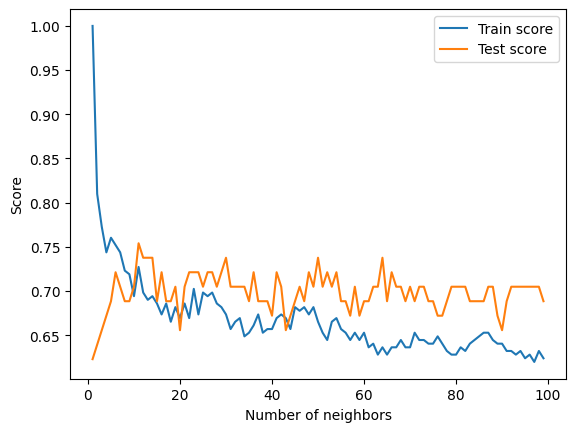

In [82]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label='Test score')
plt.xlabel("Number of neighbors")
plt.ylabel("Score")
plt.legend()
max_test = test_scores.index(max(test_scores))
print(f"Maximum KNN score on the test data: {max(test_scores)*100:0.2f}% and the n_neighbor is {max_test + 1}")

## Hyperparameter tuning with RandomizedSearchCV (CV -> Cross-validation)

tuning:
* LogisticRegression
* RandomForesrClassifier

 -----> Using RandomizedSearchCV

In [83]:
# Create a hyperparameter grid for LogisticRegression
log_red_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ['liblinear']}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50), 
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2,20,2),
           'min_samples_leaf': np.arange(1, 20, 2)}

### tuning our models using randomizedSearchCv

In [84]:
# Tune LogisticRegression

np.random.seed(42)

#Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_red_grid,
                                cv=5,
                                n_iter= 20,
                                verbose=True)
# Fit random hyperparameter search model for LogisticRegression 
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [85]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [86]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

We tuned Logistic Regression let's do the same for RandomForestClassifier()

In [87]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv = 5,
                           n_iter = 20,
                           verbose= True)

rs_rf.fit(X_train, y_train)

# Fit random hyperparameter search model for RandomForestClassifier

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [88]:
# Find the best parameters
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [89]:
# Find the best score 
rs_rf.best_score_

0.8305272108843538

In [90]:
# Test our model
round(rs_rf.score(X_test, y_test),4)

0.8689

### HyperParameter tuning:
1. by hand
2. RandomzedSearchCv
3. GridSearchCV

## Hyperparameters Tuning with GridSearchCV

Since our LogisticRegression model provides the best scores so far,
we'll try and improve them again using GridSearchCV...

In [91]:
# Different hyperparameters for our LogisticRegression model
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ['liblinear']}
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_red_grid,
                          cv = 5,
                          verbose = True)

# Fit grid hyperparameter search model 
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [92]:
# Check the best hyperparameters
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [93]:
#Evaluate the grid search LogisticRegression
gs_log_reg.score(X_test, y_test)

0.8852459016393442

## Evaluating our tuned machine learning classifier.
* ROC curve and AUC score
* Confusion matrix
* classification report 
* Precision
* Recall
* F1-score

In [94]:
# Make predictions with tuned model
y_preds = gs_log_reg.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [95]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

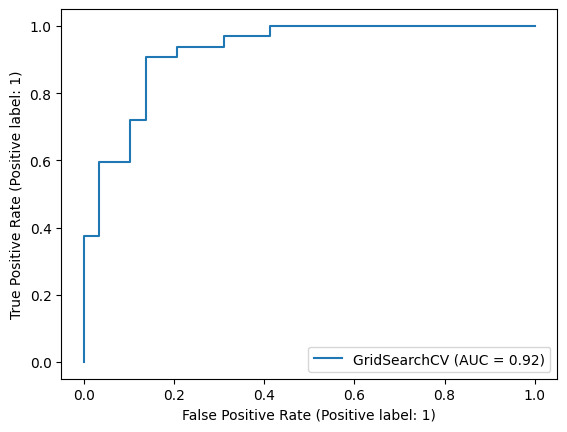

In [96]:
# import ROC curve function from sklearn.matrics --> imported before
# plot ROC curve and calculate the AUC metric
svc_disp = RocCurveDisplay.from_estimator(gs_log_reg, X_test, y_test)
# rfc_disp = RocCurveDisplay.from_estimator(rfc, X_test, y_test, ax=svc_disp.ax_)

### confusion matrix

In [97]:
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


Text(32.25, 0.5, 'Predicted label')

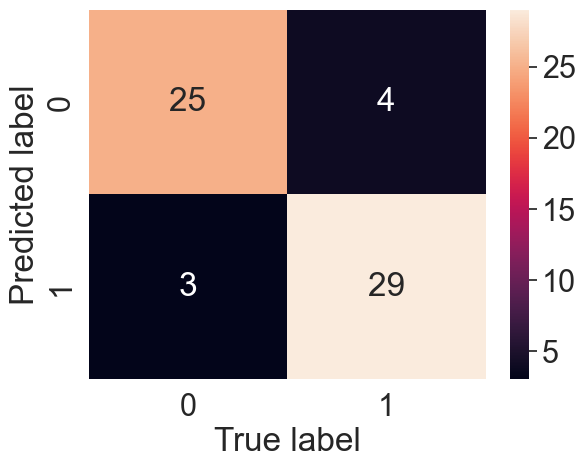

In [98]:
sns.set(font_scale= 2)
sns.heatmap(confusion_matrix(y_test, y_preds), annot=True, cbar = True)
plt.xlabel("True label")
plt.ylabel("Predicted label")

In [99]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Cross-validate in precision report 

### Claculate evaluation metrcis using cross-validation

Using cross_val_score

In [100]:
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [101]:
# Create a new classifier with best parameters
clf = LogisticRegression(C = 0.23357214690901212, solver='liblinear')

In [102]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring='accuracy')
cv_acc.mean()

0.8479781420765027

In [103]:
# Cross-validated precision
cv_precision = cross_val_score(clf,
                               X,
                               y,
                               cv=5,
                               scoring='precision')
cv_precision.mean()

0.8215873015873015

In [104]:
cv_recall = cross_val_score(clf,
                               X,
                               y,
                               cv=5,
                               scoring='recall')
cv_recall.mean()

0.9272727272727274

In [105]:
# Cross-validated recal
cv_f1 = cross_val_score(clf,
                               X,
                               y, 
                               cv = 5,
                               scoring='f1')
cv_f1.mean()

0.8705403543192143

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Accuracy'),
  Text(1, 0, 'Precision'),
  Text(2, 0, 'Recall'),
  Text(3, 0, 'F1_score')])

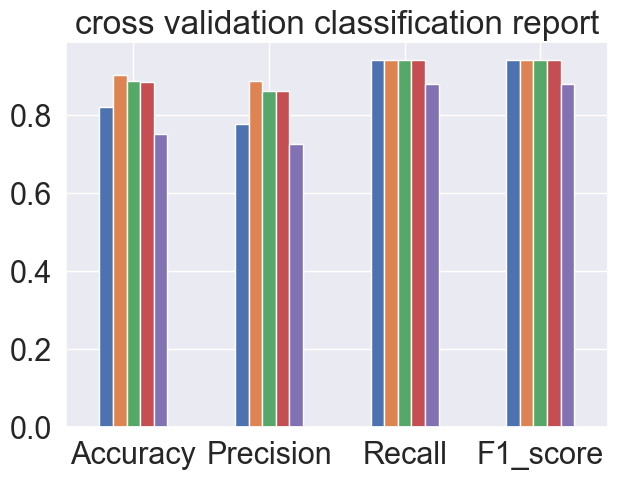

In [106]:
# Visualize cross-validated metrics 
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1_score": cv_recall})
cv_metrics.T.plot(kind='bar', title="cross validation classification report", figsize=(7,5), legend=False)
plt.xticks(rotation = False)


In [107]:
cv_metrics

,Accuracy,Precision,Recall,F1_score
0,0.819672,0.775000,0.939394,0.939394
1,0.901639,0.885714,0.939394,0.939394
2,0.885246,0.861111,0.939394,0.939394
3,0.883333,0.861111,0.939394,0.939394
4,0.750000,0.725000,0.878788,0.878788


### Feature importance

feature importance is another way for asking: "Which features contributed most to the outcome of the model and how did they contributed ?"

In [108]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


* Finding feature importance for out LogisticRegression model

In [109]:
gs_log_reg.best_params_


{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [110]:
clf = LogisticRegression(C = 0.23357214690901212, solver = 'liblinear')
clf.fit(X_train, y_train)

LogisticRegression(C=0.23357214690901212, solver='liblinear')

In [111]:
clf.coef_

array([[ 0.00369922, -0.9042409 ,  0.67472826, -0.0116134 , -0.00170364,
         0.04787688,  0.33490198,  0.02472938, -0.63120406, -0.5759095 ,
         0.47095141, -0.65165348, -0.69984208]])

In [113]:
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0036992207735222936,
 'sex': -0.9042409027676933,
 'cp': 0.6747282591013247,
 'trestbps': -0.011613401311995881,
 'chol': -0.001703643974904055,
 'fbs': 0.04787688089306608,
 'restecg': 0.3349019821325941,
 'thalach': 0.024729382907772574,
 'exang': -0.6312040609811942,
 'oldpeak': -0.5759095019287949,
 'slope': 0.4709514064291035,
 'ca': -0.6516534774104941,
 'thal': -0.6998420760932893}

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'age'),
  Text(1, 0, 'sex'),
  Text(2, 0, 'cp'),
  Text(3, 0, 'trestbps'),
  Text(4, 0, 'chol'),
  Text(5, 0, 'fbs'),
  Text(6, 0, 'restecg'),
  Text(7, 0, 'thalach'),
  Text(8, 0, 'exang'),
  Text(9, 0, 'oldpeak'),
  Text(10, 0, 'slope'),
  Text(11, 0, 'ca'),
  Text(12, 0, 'thal')])

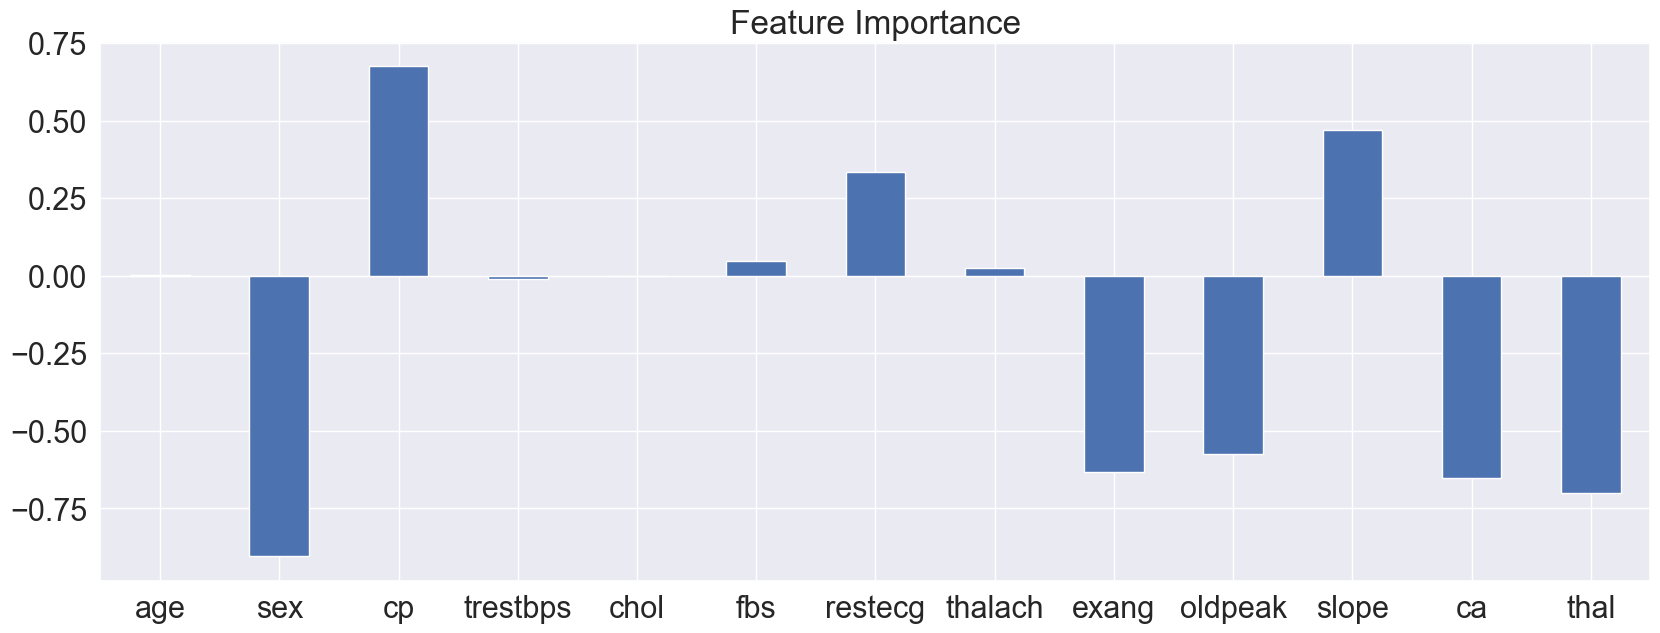

In [119]:
#Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot(kind='bar', title='Feature Importance', legend=False, figsize=(20,7))
plt.xticks(rotation = False)

In [120]:
pd.crosstab(df['sex'], df['target'])

target,0,1
sex,,
0,24,72
1,114,93
